In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
file = pd.read_csv('weatherAUS.csv')

In [3]:
file.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


<AxesSubplot:>

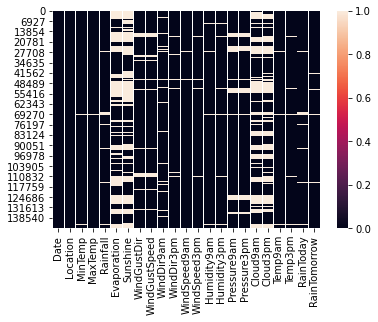

In [4]:
sns.heatmap(file.isnull())

Feito o heatmap observamos que 'Evaporation'e 'Sunshine' possum muitos dados faltantes, então terão que ser descartados

In [5]:
file[file['RainToday'] == 'Yes']

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No
11,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
12,2008-12-13,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
13,2008-12-14,Albury,12.6,21.0,3.6,NaN,NaN,SW,44.0,W,...,65.0,43.0,1001.2,1001.8,NaN,7.0,15.8,19.8,Yes,No
17,2008-12-18,Albury,13.5,22.9,16.8,NaN,NaN,W,63.0,N,...,80.0,65.0,1005.8,1002.2,8.0,1.0,18.0,21.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145325,2017-02-11,Uluru,22.2,39.4,6.2,NaN,NaN,S,30.0,S,...,56.0,25.0,1008.4,1004.9,NaN,4.0,28.6,38.7,Yes,No
145391,2017-04-18,Uluru,15.2,21.5,6.8,NaN,NaN,ENE,30.0,NE,...,65.0,65.0,1016.9,1015.3,3.0,8.0,19.0,21.2,Yes,Yes
145392,2017-04-19,Uluru,17.7,26.9,12.6,NaN,NaN,S,35.0,E,...,93.0,59.0,1018.1,1014.7,7.0,8.0,19.0,26.0,Yes,Yes
145393,2017-04-20,Uluru,18.6,28.6,34.6,NaN,NaN,E,46.0,E,...,100.0,56.0,1020.0,1015.8,8.0,5.0,19.8,26.9,Yes,Yes


<AxesSubplot:xlabel='RainToday', ylabel='MaxTemp'>

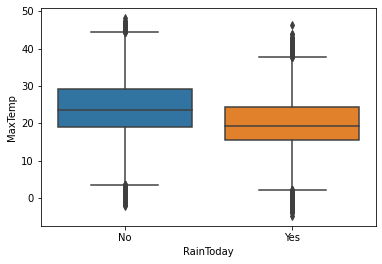

In [6]:
sns.boxplot(x='RainToday', y='MaxTemp', data=file)

Observamos em cima que a temperatura máxima de dias chuvosos está bem abaixo da máxima em dias não chuvosos

<AxesSubplot:xlabel='RainToday', ylabel='MinTemp'>

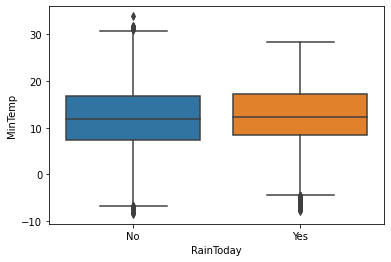

In [7]:
sns.boxplot(x='RainToday', y='MinTemp', data=file)

No entanto aqui, a temperatura mínima não apresenta grandes diferenças

In [8]:
file.drop(['Date', 'Location','Evaporation','Sunshine', 'WindGustDir','WindDir9am', 'Cloud9am', 'Cloud3pm','WindDir3pm',],axis=1, inplace=True)

Aqui retirei colunas que achei desnecessárias como data, localidade,direção do vento, e também as colunas 'Evaporation' e 'Sunshine'

In [9]:
file.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


A coluna RainToday é a base no nosso experimento, e a coluna RainTomorrow será utilizada também para tentarmos prever se irá chover no dia seguinte com base no dia anterior.

Como só há duas respostas para a pergunta, 'Sim' e 'Não', substituiremos as colunas por valores numéricos 0 e 1 para serem trabalhadas no modelo de machine learning, e tomaremos os dados faltantes como 0, ou seja não choveu.

In [10]:
file['RainToday'] = pd.get_dummies(file['RainToday'],drop_first=True)

In [11]:
file['RainTomorrow'] = pd.get_dummies(file['RainTomorrow'],drop_first=True)

In [12]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144199 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   WindGustSpeed  135197 non-null  float64
 4   WindSpeed9am   143693 non-null  float64
 5   WindSpeed3pm   142398 non-null  float64
 6   Humidity9am    142806 non-null  float64
 7   Humidity3pm    140953 non-null  float64
 8   Pressure9am    130395 non-null  float64
 9   Pressure3pm    130432 non-null  float64
 10  Temp9am        143693 non-null  float64
 11  Temp3pm        141851 non-null  float64
 12  RainToday      145460 non-null  uint8  
 13  RainTomorrow   145460 non-null  uint8  
dtypes: float64(12), uint8(2)
memory usage: 13.6 MB


Agora para tratar os restos dos dados, substituiremos os espaços faltantes pela média da coluna

In [13]:
for i in file.columns:
    mean = np.mean(file[i])
    file.update(file[i].fillna(mean))

<AxesSubplot:>

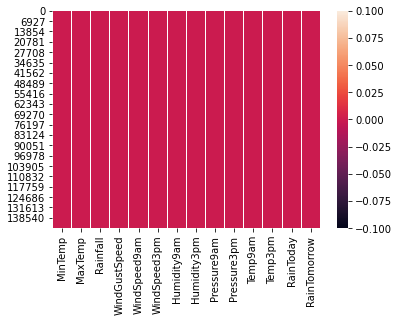

In [14]:
sns.heatmap(file.isnull()) #Feito

In [15]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   WindGustSpeed  145460 non-null  float64
 4   WindSpeed9am   145460 non-null  float64
 5   WindSpeed3pm   145460 non-null  float64
 6   Humidity9am    145460 non-null  float64
 7   Humidity3pm    145460 non-null  float64
 8   Pressure9am    145460 non-null  float64
 9   Pressure3pm    145460 non-null  float64
 10  Temp9am        145460 non-null  float64
 11  Temp3pm        145460 non-null  float64
 12  RainToday      145460 non-null  uint8  
 13  RainTomorrow   145460 non-null  uint8  
dtypes: float64(12), uint8(2)
memory usage: 13.6 MB


Agora separamos os dados, primeiro para predizer se chove hoje

In [16]:
rain = file['RainToday'] #coluna a ser observada
x_data = file.drop(['RainToday','RainTomorrow'], axis=1) #Dados a serem utilizados

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x_data,rain,test_size=0.2, random_state=19)

In [18]:
model_rain = LogisticRegression()

In [19]:
model_rain.fit(X_train,y_train)

/home/bannager/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
prediction = model_rain.predict(X_test)

In [21]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     22771
           1       0.91      0.88      0.89      6321

    accuracy                           0.96     29092
   macro avg       0.94      0.93      0.93     29092
weighted avg       0.95      0.96      0.95     29092



Assim chegamos ao modelo com uma precisão maior que 90%, após isso criaremos um novo modelo para predizer se irá chover amanhã.

In [22]:
rain_tomorrow = file['RainTomorrow'] #coluna a ser observada
x_data_2 = file.drop(['RainTomorrow'], axis=1) #Dados utilizados

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x_data_2,rain_tomorrow,test_size=0.2, random_state=19)

In [24]:
model_rain_tomorrow = LogisticRegression()

In [25]:
model_rain_tomorrow.fit(X_train,y_train)

/home/bannager/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
prediction = model_rain_tomorrow.predict(X_test)

In [27]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22821
           1       0.71      0.44      0.54      6271

    accuracy                           0.84     29092
   macro avg       0.78      0.69      0.72     29092
weighted avg       0.83      0.84      0.83     29092



Assim finalizamos o experimento, o modelo rain_tomorrow não teve uma precisão tão grande quanto ao anterior, mas ainda assim se manteve acima dos 70% de acerto